# Title: Churn Prediction using Machine Learning

### Author: MUHAMMED RAEED MK

### Date : 01/10/2024

### Introduction

This project aims to develop a machine learning model to predict customer churn for a telecommunications company. The model uses a combination of exploratory data analysis, feature engineering, and hyperparameter tuning to achieve high accuracy in predicting churn.
Code Structure

The code is organized into the following sections:

   - Step 1: Load and Explore Data
   - Step 2: EDA (Exploratory Data Analysis)
   - Step 3: Data Preprocessing
   - Step 4: Feature Engineering (One-Hot Encoding for categorical variables)
   - Step 5: Split the Data
   - Step 6: Hyperparameter Tuning with Random Forest
   - Step 7: Model Evaluation
   - Step 8: Save the Best Model

Features

   - Data Loading and Exploration: The model loads a CSV file containing customer data and performs exploratory data    analysis to understand the distribution of churn and correlations between features.
   - Data Preprocessing: The model preprocesses the data by handling missing values, converting categorical variables, and scaling numerical features.
   - Feature Engineering: The model applies one-hot encoding to categorical variables and scales numerical features using a column transformer.
   - Hyperparameter Tuning: The model uses GridSearchCV to tune hyperparameters for a random forest classifier and selects the best parameters for optimal performance.
   - Model Evaluation: The model evaluates its performance using classification report and accuracy score on the test set.
   - Model Saving: The model saves the best-performing model to a pickle file for future use.

Overview

This project focuses on predicting customer churn for a telecom company using machine learning techniques. Customer churn, the event of customers discontinuing a service, is a significant business challenge. Accurately predicting churn enables businesses to implement proactive strategies to retain at-risk customers and enhance profitability.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, roc_auc_score, 
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [23]:
# Step 1: Load and Explore Data
file_path = 'telico.csv'
data = pd.read_csv(file_path)

In [24]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

In [25]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [26]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


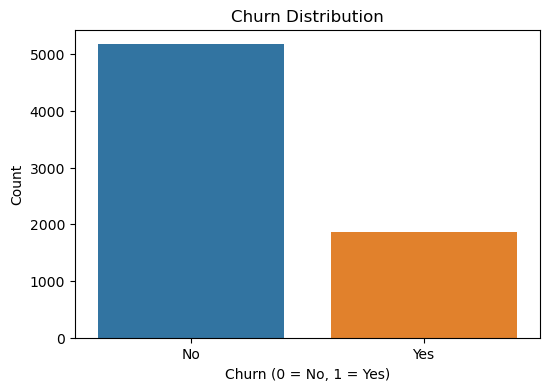

In [27]:
# Step 2: EDA (Exploratory Data Analysis)
# Churn distribution plot with labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

C:\Users\MY PC\AppData\Local\Temp\ipykernel_11352\814978575.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


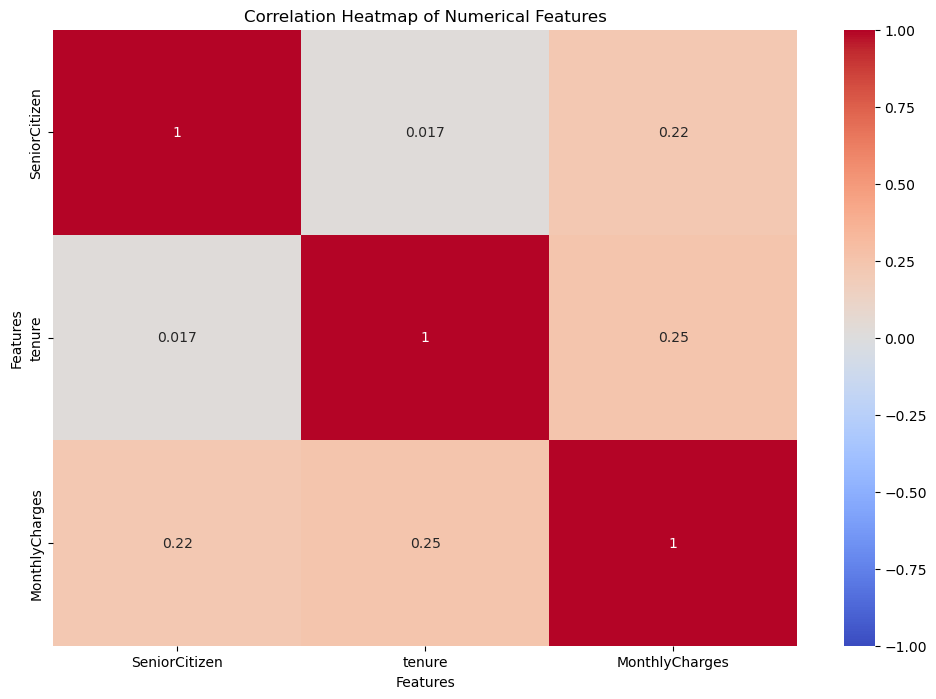

In [28]:
# Heatmap with axis labels and clearer title
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [29]:
print("\nUnique Values in Categorical Columns:")
print(data.nunique())


Unique Values in Categorical Columns:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [30]:
# Step 3: Data Preprocessing with Error Handling
# Drop unnecessary columns
data.drop(['customerID'], axis=1, inplace=True)

# Handle missing or non-numeric values in 'TotalCharges'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(f"\nNon-numeric or missing values in 'TotalCharges': {data['TotalCharges'].isna().sum()}")

# Replace NaN values with the median of 'TotalCharges'
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Convert 'Churn' to binary (0 = No, 1 = Yes)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split columns into numerical and categorical
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']


Non-numeric or missing values in 'TotalCharges': 11


In [31]:
# Step 4: Feature Engineering and Transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [32]:
# Step 5: Split the Data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Step 6: Hyperparameter Tuning with Cross-Validation Scores
classifiers_and_params = {
    'Logistic Regression': (LogisticRegression(max_iter=500), {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l2']
    }),
    'Support Vector Classifier': (SVC(), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'MLP Classifier': (MLPClassifier(max_iter=500), {
        'classifier__hidden_layer_sizes': [(50, 50), (100,)],
        'classifier__activation': ['tanh', 'relu']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, 30]
    })
}

best_estimators = {}
cv_scores = {}

for name, (classifier, param_grid) in classifiers_and_params.items():
    print(f"\nTuning {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")


Tuning Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}

Tuning Support Vector Classifier...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Support Vector Classifier: {'classifier__C': 1, 'classifier__kernel': 'rbf'}

Tuning Decision Tree...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

Tuning MLP Classifier...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for MLP Classifier: {'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (100,)}

Tuning Random Forest...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}


In [34]:
    # Store the best estimator
    best_estimators[name] = grid_search.best_estimator_

In [35]:
    # Compute cross-validation accuracy score
    cv_score = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores[name] = cv_score
    print(f"Cross-Validation Accuracy for {name}: {cv_score:.4f}")


Cross-Validation Accuracy for Random Forest: 0.8028



Evaluating Random Forest...

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy: 0.8017, F1-Score (Churn): 0.5823, ROC-AUC: 0.8540


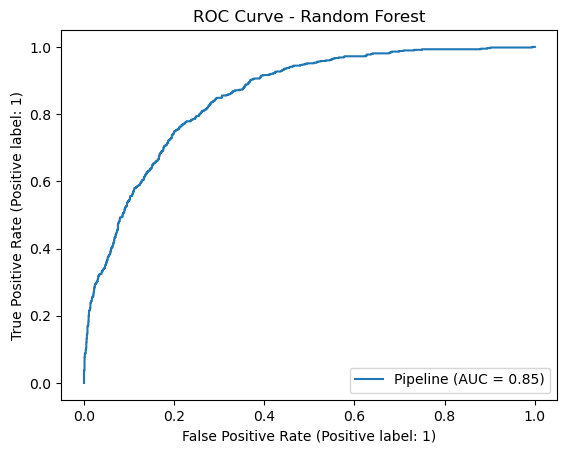

In [36]:
# Step 7: Detailed Model Evaluation
evaluation_results = []

for name, model in best_estimators.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None
    
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}, F1-Score (Churn): {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    
    evaluation_results.append((name, accuracy, f1, roc_auc))
    
    # Plot ROC Curve if applicable
    if roc_auc is not None:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'ROC Curve - {name}')
        plt.show()

In [37]:
# Step 8: Save the Best Model Based on Evaluation Metrics
best_model_name, *_ = max(evaluation_results, key=lambda x: (x[2], x[3]))  # Prioritize F1-score and ROC-AUC
best_model = best_estimators[best_model_name]
joblib.dump(best_model, 'best_churn_prediction_model.pkl')

print(f"\nThe best model is {best_model_name} based on F1-Score and ROC-AUC.")



The best model is Random Forest based on F1-Score and ROC-AUC.
